## T test

The t-test quantifies the difference between the arithmetic means of the two samples. 
The p-value quantifies the probability of observing as or more extreme values assuming the null hypothesis, 
that the samples are drawn from populations with the same population means, is true. A p-value larger 
than a chosen threshold (e.g. 5% or 1%) indicates that our observation is not so unlikely to have occurred by chance. 
Therefore, we do not reject the null hypothesis of equal population means. If the p-value is smaller than our threshold, 
then we have evidence against the null hypothesis of equal population means.
*The p-value quantifies the probability of observing as or more extreme values assuming the null hypothesis*
Jeśli więc mamy wysokie p-value to oznacza że dużo innych par prób osiągnęło róznice w średniej równą lub wyższą niż obserwowana w badanych próbach - to co zaobserwowaliśmy w próbach nie jest więc niczym wyjątkowym (zostajemy przy H0 - równe średnie)

In [11]:
from scipy import stats
import numpy as np
a = np.random.randn(40)
b = 5*np.random.randn(50)
stats.ttest_ind(a, b,equal_var=False)

Ttest_indResult(statistic=-0.8757475210549339, pvalue=0.385103397290132)

## ANOVA

Badanie istotności statystycznej różnic pomiędzy kilkoma grupami - ANOVA (Analiza Wariancji). Alternatywa dla porównań parami (w tym przypadku byłaby duża szansa na odkrycie zależności ktore tak naprawdę nie istnieją - błąd 1 rodzaju).
Ogólne kroki:
1. Połączenie danych w jeden zbiór
2. Wymieszanie wartości i stworzenie noych X grup po n wartości w każdej
3. Podliczenie średniej w każdej z grup
4. Policzenie wariancji dla średnich w grupach
5. Powtórzyć kroki 2-4 wiele razy
Jak często wariancja przekroczyła obserwowaną wariancję? To p-wartość dla testu


In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.array([[5, 4, 7, 5], [2, 7, 6, 3], [2, 5, 8, 8],[1, 1, 11, 12],[4, 9, 15, 11]]),columns=['a', 'b', 'c', 'd'])
df.reset_index(inplace=True)
df = df.melt(id_vars = ['index'],value_vars = ['a', 'b', 'c', 'd'])
df.columns = ['index','treatment','value']

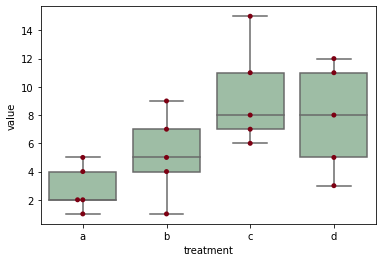

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatment', y='value', data=df, color='#99c2a2')
ax = sns.swarmplot(x="treatment", y="value", data=df, color='#7d0013')
plt.show()

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatment)', data=df).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatment),3.0,126.6,42.200,4.230576,0.02214
Residual,16.0,159.6,9.975,NaN,NaN


df - stopnie swobody
sum sq - suma błędów kwadratów
mean_sq - odchylenia średniokwadratowe
f - wartość statystyki F

Treatment sum sq -> suma kwadratow roznic pomiedzy średnią grupy a średnią całkowitą
Residual sum sq -> suma kadratow roznic pomiedzy obserwacja w grupie a średnią dla grupy.
Mean sq to sum_sq / df

1 przykład P value = 10.7% a więc przyjmujemy H0. Różnice mogą pochodzić głównie z przypadku.
2 przykład P value = 2.2% przyjmujemy H1. Przynajmniej jeden ze sposobów leczenia ma średnią znacząco różną od pozostałych

Bazując na Anova nie wiemy jednak która średnia znacząco rózni się od pozostałych. Żeby to sprawdzic trzeba wykonać dalsze kroki - porównania parami, test Tuckeya

Test dla ANOVY bazuje na statystyce F (stosunek wariancji średnich w grupach do wariancji ze względu na błędy resztowe).
Hipoteza zerowa - średnie w grupach są takie same
Alternatywna - przynajmniej jedna średnia grupy różni się od pozostałych.


## CHI SQUARE TEST

Non parametric method to compare the relationship between two categoricl variables

relies on approximation. Hence require large sample size. Expected frequency should not be < 5. 
If sample size is small Fisher exact test should be used

H0: Two categorical variables are independent
H1: Two categorical variables are dependent

In [2]:
import numpy as np
from scipy.stats import chi2_contingency
observed = np.array([[20,50],[31,33]])

In [6]:
chi_stat,p_val,dof,expected = chi2_contingency(observed)

In [5]:
#without Yates correction for continuity
chi_stat,p_val,dof,expected = chi2_contingency(observed,correction=False)

In [7]:
p_val

0.028690975076064325

significant p-value -> we conclude that there is significant association between categorical variables

In [8]:
expected

array([[26.64179104, 43.35820896],
       [24.35820896, 39.64179104]])

## FISHER EXACT TEST

Testing the association between the two independent categorical variables. 

H0: No association between two categorical variables

H1: There is an association between two categorical variables
    
Chi-square gices approximate pvalue and Fisher gives exact p-value.

In [10]:
import pandas as pd
treat = pd.DataFrame({'drug A':[70,40],'drug B':[40,55]},index=pd.Index(['no disease','disease']))
treat

,drug A,drug B
no disease,70,40
disease,40,55


In [12]:
from scipy.stats import fisher_exact
oddsr, p_val = fisher_exact(table=treat.to_numpy(), alternative='two-sided')
oddsr, p_val

(2.40625, 0.003087959769108495)

p-value statistically significant - we reject H0. 
There is a significant association between drug treatment and disease status

Odds Ratio - odds of getting no disease while on drug treatment is 2.4 times that of getting the disease. 
Someone not taking drugs is more likely to have a disease than a person who takes drugs